In [1]:
import os
import  tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image

In [2]:
base_dir = '/Users/ASUS/Desktop/susah/capstone-project/dataset tanah fix/train'

cinder = os.path.join(base_dir, 'cinder')
gambut = os.path.join(base_dir, 'gambut')
humus = os.path.join(base_dir, 'humus')
kapur = os.path.join(base_dir, 'kapur')
laterit = os.path.join(base_dir, 'laterit')
pasir = os.path.join(base_dir, 'pasir')

print('total gambar aluvial:', len(os.listdir(cinder)))
print('total gambar andosol:', len(os.listdir(gambut)))
print('total gambar humus:', len(os.listdir(humus)))
print('total gambar kapur:', len(os.listdir(kapur)))
print('total gambar laterit:', len(os.listdir(laterit)))
print('total gambar pasir:', len(os.listdir(pasir)))

cinder_files = os.listdir(cinder)
print(cinder_files[:5])

gambut_files = os.listdir(gambut)
print(gambut_files[:5])

humus_files = os.listdir(humus)
print(humus_files[:5])

kapur_files = os.listdir(kapur)
print(kapur_files[:5])

laterit_files = os.listdir(laterit)
print(laterit_files[:5])

pasir_files = os.listdir(pasir)
print(pasir_files[:5])

total gambar aluvial: 42
total gambar andosol: 42
total gambar humus: 42
total gambar kapur: 42
total gambar laterit: 42
total gambar pasir: 42
['1.jpg', '11.jpg', '11_012_CAVO_cinders_along_summit_road_2011-0510.jpg', '12.jpg', '13.jpg']
['1.jpg', '10.jpg', '13.jpg', '14.jpg', '15.jpg']
['10.jpg', '11.jpg', '2.jpg', '21.jpg', '31.jpg']
['kapur-001.jpg', 'kapur-002.jpg', 'kapur-003.jpg', 'kapur-004.jpg', 'kapur-005.jpg']
['1.jpg', '10.jpg', '11.jpg', '13.jpg', '14.jpg']
['10.jpg', '11.jpg', '12.jpg', '14.jpg', '15.jpg']


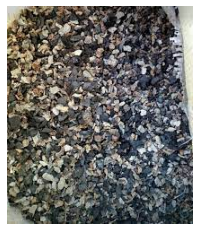

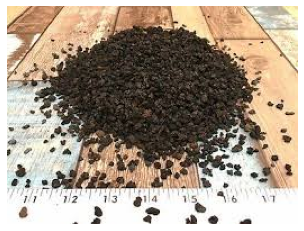

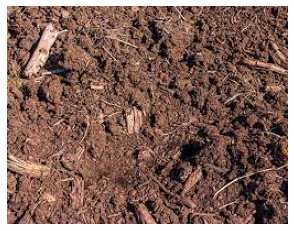

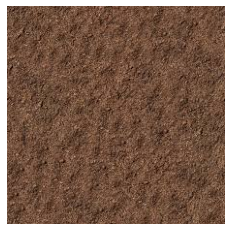

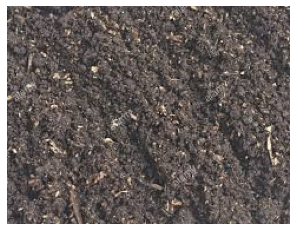

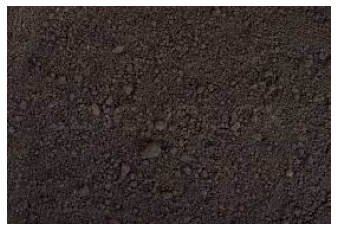

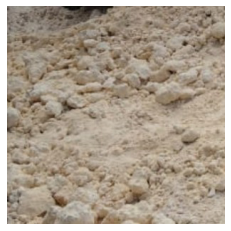

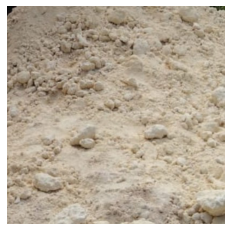

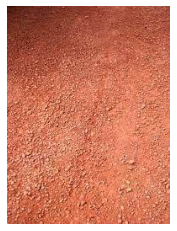

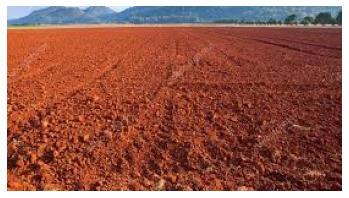

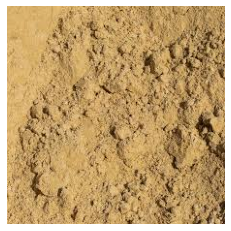

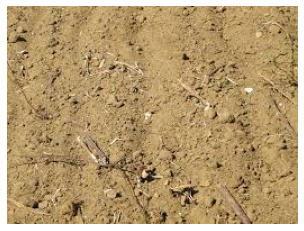

In [3]:
pic_index = 2

next_cinder = [os.path.join(cinder, fname) for fname in cinder_files[pic_index-2:pic_index]]
next_gambut = [os.path.join(gambut, fname) for fname in gambut_files[pic_index-2:pic_index]]
next_humus = [os.path.join(humus, fname) for fname in humus_files[pic_index-2:pic_index]]
next_kapur = [os.path.join(kapur, fname) for fname in kapur_files[pic_index-2:pic_index]]
next_laterit = [os.path.join(laterit, fname) for fname in laterit_files[pic_index-2:pic_index]]
next_pasir = [os.path.join(pasir, fname) for fname in pasir_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cinder+next_gambut+next_humus+next_kapur+next_laterit+next_pasir):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(150, 150, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 96)      

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [7]:
TRAINING_DIR = base_dir
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True)

VALIDATION_DIR = "/Users/ASUS/Desktop/susah/capstone-project/dataset tanah fix/test"
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=10
)

Found 251 images belonging to 6 classes.
Found 66 images belonging to 6 classes.


In [8]:
history = model.fit(train_generator, epochs=50, verbose = 1, validation_data = validation_generator)

Epoch 1/50
26/26 [==============================] - 10s 359ms/step - loss: 1.5176 - accuracy: 0.2988 - val_loss: 1.2526 - val_accuracy: 0.4848
Epoch 2/50
26/26 [==============================] - 9s 330ms/step - loss: 1.2386 - accuracy: 0.4821 - val_loss: 1.2528 - val_accuracy: 0.4242
Epoch 3/50
26/26 [==============================] - 8s 316ms/step - loss: 1.0893 - accuracy: 0.5618 - val_loss: 1.3373 - val_accuracy: 0.5758
Epoch 4/50
26/26 [==============================] - 8s 301ms/step - loss: 0.9381 - accuracy: 0.6414 - val_loss: 0.6814 - val_accuracy: 0.7576
Epoch 5/50
26/26 [==============================] - 8s 301ms/step - loss: 0.7805 - accuracy: 0.7171 - val_loss: 0.4960 - val_accuracy: 0.8333
Epoch 6/50
26/26 [==============================] - 8s 302ms/step - loss: 0.5822 - accuracy: 0.7809 - val_loss: 0.5777 - val_accuracy: 0.8030
Epoch 7/50
26/26 [==============================] - 8s 304ms/step - loss: 0.7639 - accuracy: 0.6972 - val_loss: 0.8867 - val_accuracy: 0.7273
Epoch

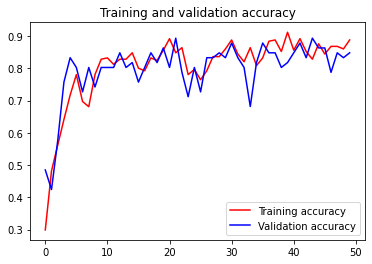

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('/Users/ASUS/Desktop/susah/capstone-project/klasifikasi jenis tanah7.png')
plt.show()

In [10]:
images = os.listdir("/Users/ASUS/Desktop/susah/capstone-project/image2")

print(images)

for i in images:
    print()
    path = '/Users/ASUS/Desktop/susah/capstone-project/image2/' + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(path)
    print(classes)

['cinder 1.jpg', 'cinder 2.jpg', 'cinder 3.jpg', 'cinder 4.jpg', 'gambut 1.jpg', 'gambut 2.jpg', 'gambut 3.jpg', 'gambut 4.jpg', 'humus 1.jpg', 'humus 2.jpg', 'humus 3.jpg', 'humus 4.jpg', 'kapur 1.jpg', 'kapur 2.jpg', 'kapur 3.jpg', 'kapur 4.jpg', 'laterit 1.jpg', 'laterit 2.jpg', 'laterit 3.jpg', 'laterit 4.jpg', 'pasir 1.jpg', 'pasir 2.jpg', 'pasir 3.jpg', 'pasir 4.jpg']

/Users/ASUS/Desktop/susah/capstone-project/image2/cinder 1.jpg
[[1. 0. 0. 0. 0. 0.]]

/Users/ASUS/Desktop/susah/capstone-project/image2/cinder 2.jpg
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.0742488e-18]]

/Users/ASUS/Desktop/susah/capstone-project/image2/cinder 3.jpg
[[1. 0. 0. 0. 0. 0.]]

/Users/ASUS/Desktop/susah/capstone-project/image2/cinder 4.jpg
[[0. 1. 0. 0. 0. 0.]]

/Users/ASUS/Desktop/susah/capstone-project/image2/gambut 1.jpg
[[0. 1. 0. 0. 0. 0.]]

/Users/ASUS/Desktop/susah/capstone-project/image2/gambut 2.jpg
[[0. 0. 0. 1. 0. 0.]]

/Users/ASUS/Desktop/susah/capstone-pro

In [11]:
model.save('/Users/ASUS/Desktop/susah/capstone-project/klasifikasi jenis tanah7.h5')